<a href="https://colab.research.google.com/github/vaishnavi-patil05/Web_Scrapimg-project/blob/main/Nyka_Lipstick_WebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup as bs


In [ ]:
import requests
import numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = 'https://www.nykaa.com/makeup/lips/lipstick/c/249'
response = requests.get(url)
response

<Response [200]>

In [ ]:
response.status_code

200

In [ ]:
type(response.text)


str

In [ ]:
soup = bs(response.text)
type(soup)

bs4.BeautifulSoup

In [ ]:
soup = bs(response.text)
type(soup)

bs4.BeautifulSoup

In [ ]:
soup.find('title').text

'Lipsticks - Buy Lipstick Online at Best Price in India | Nykaa'

In [ ]:
name=[i.text for i in soup.find_all('div',class_='css-xrzmfa')]
name

['Nykaa So Creme! Creamy Matte Lipstick',
 'Maybelline New York Color Sensational Ultimattes Lipstick',
 'Faces Canada Ultime Pro Hd Intense Matte Lips + Primer',
 'Kay Beauty Matte Drama Long Stay Lipstick',
 'NYX Professional Makeup Powder Puff Lippie Cream',
 'M.A.C Retro Matte Lipstick - Ruby Woo',
 'Belora Paris Deepest Hd Matte',
 'Just Herbs Ayurvedic Matte Lipstick Micro-Mini Trial Kit',
 'Max Factor Colour Elixir Lipstick',
 'Maybelline New York Color Sensational Creamy Matte Lipstick',
 'Lakme Forever Matte Liquid Lip Color',
 'Lakme 9 To 5 Primer + Matte Lipstick',
 'M.A.C Lipstick / Mini',
 'Lakme 9 to 5 Weightless Matte Mousse Lip & Cheek Color',
 'SUGAR Cosmetics Matte Attack Transferproof Lipstick',
 'Nykaa Ultra Matte Mini Lipstick',
 'Elle 18 Color Pop Matte Lip Color',
 'Love Earth Multipot Lip and Cheek Tint',
 'Kay Beauty Matteinee Matte Lip Crayon Lipstick',
 'SUGAR Matte As Hell Crayon Lipstick With Free Sharpener']

In [ ]:
original_price=[(i.text).strip('MRP:') for i in soup.find_all('span',class_="css-17x46n5")]
original_price

['₹299',
 '₹549',
 '₹799',
 '',
 '₹650',
 '',
 '₹699',
 '₹575',
 '₹800',
 '₹299',
 '',
 '₹500',
 '',
 '₹675',
 '₹699',
 '',
 '',
 '₹599',
 '₹799',
 '₹799']

In [ ]:
Discount_price=[i.text for i in soup.find_all('span',class_="css-111z9ua")]
Discount_price

['₹239',
 '₹410',
 '₹639',
 '₹999',
 '₹455',
 '₹1750',
 '₹419',
 '₹460',
 '₹600',
 '₹239',
 '₹295',
 '₹425',
 '₹1050',
 '₹608',
 '₹559',
 '₹239',
 '₹80',
 '₹299',
 '₹639',
 '₹719']

In [ ]:
gifts=[ i.find('p',class_='css-i6xqbh').text if i.find('p',class_='css-i6xqbh') else np.NaN for i in soup.find_all('div',class_='css-1rd7vky') ]
gifts

['Get Free Product',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Enjoy Free Gift',
 'Extra 10% Off',
 'Enjoy Free Gift',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Enjoy Free Gift',
 'Get Free Product',
 nan,
 nan,
 nan,
 'Enjoy Free Gift']

In [ ]:
reviews=[(i.text).strip('(').strip(')') for i in soup.find_all('span',class_="css-1j33oxj")]
reviews

[' 55012 ',
 ' 3102 ',
 ' 20901 ',
 ' 3190 ',
 ' 6348 ',
 ' 7547 ',
 ' 75 ',
 ' 9723 ',
 ' 18 ',
 ' 88731 ',
 ' 46337 ',
 ' 11218 ',
 ' 20646 ',
 ' 36432 ',
 ' 7544 ',
 ' 13861 ',
 ' 9239 ',
 ' 4711 ',
 ' 14178 ',
 ' 10453 ']

In [ ]:
offer=[i.find('span',class_="css-r2b2eh").text if i.find('span',class_="css-r2b2eh") else np.NaN for i in soup.find_all('div',class_='css-1rd7vky')]
offer

['20% Off',
 '25% Off',
 '20% Off',
 nan,
 '30% Off',
 nan,
 '40% Off',
 '20% Off',
 '25% Off',
 '20% Off',
 nan,
 '15% Off',
 nan,
 '10% Off',
 '20% Off',
 nan,
 nan,
 '50% Off',
 '20% Off',
 '10% Off']

In [ ]:
shade=[i.find('div',class_="css-asphnc").text.strip('shades') if i.find('div',class_="css-asphnc") else '1' for i in soup.find_all('div',class_='css-1rd7vky')]
shade

['18 ',
 '8 ',
 '23 ',
 '24 ',
 '8 ',
 '1',
 '20 ',
 '1',
 '21 ',
 '26 ',
 '30 ',
 '35 ',
 '17 ',
 '13 ',
 '16 ',
 '12 ',
 '25 ',
 '9 ',
 '21 ',
 '29 ']

In [ ]:
lip_details=[]
for n,o,d,off,shad,gif,r in zip (name,original_price,Discount_price,offer,shade,gifts,reviews):
  lip_details.append({'Product_name':n,'Original_price':o,'Discount_price':d,'Offers':off,'Shades':shad,'Gifts':gif ,'Reviews':r})


lip_details

[{'Product_name': 'Nykaa So Creme! Creamy Matte Lipstick',
  'Original_price': '₹299',
  'Discount_price': '₹239',
  'Offers': '20% Off',
  'Shades': '18 ',
  'Gifts': 'Get Free Product',
  'Reviews': ' 55012 '},
 {'Product_name': 'Maybelline New York Color Sensational Ultimattes Lipstick',
  'Original_price': '₹549',
  'Discount_price': '₹410',
  'Offers': '25% Off',
  'Shades': '8 ',
  'Gifts': nan,
  'Reviews': ' 3102 '},
 {'Product_name': 'Faces Canada Ultime Pro Hd Intense Matte Lips + Primer',
  'Original_price': '₹799',
  'Discount_price': '₹639',
  'Offers': '20% Off',
  'Shades': '23 ',
  'Gifts': nan,
  'Reviews': ' 20901 '},
 {'Product_name': 'Kay Beauty Matte Drama Long Stay Lipstick',
  'Original_price': '',
  'Discount_price': '₹999',
  'Offers': nan,
  'Shades': '24 ',
  'Gifts': nan,
  'Reviews': ' 3190 '},
 {'Product_name': 'NYX Professional Makeup Powder Puff Lippie Cream',
  'Original_price': '₹650',
  'Discount_price': '₹455',
  'Offers': '30% Off',
  'Shades': '8 '

In [ ]:
lipsticks_df=pd.DataFrame(lip_details)
lipsticks_df

,Product_name,Original_price,Discount_price,Offers,Shades,Gifts,Reviews
0,Nykaa So Creme! Creamy Matte Lipstick,₹299,₹239,20% Off,18,Get Free Product,55012
1,Maybelline New York Color Sensational Ultimatt...,₹549,₹410,25% Off,8,NaN,3102
2,Faces Canada Ultime Pro Hd Intense Matte Lips ...,₹799,₹639,20% Off,23,NaN,20901
3,Kay Beauty Matte Drama Long Stay Lipstick,,₹999,NaN,24,NaN,3190
4,NYX Professional Makeup Powder Puff Lippie Cream,₹650,₹455,30% Off,8,NaN,6348
5,M.A.C Retro Matte Lipstick - Ruby Woo,,₹1750,NaN,1,NaN,7547
6,Belora Paris Deepest Hd Matte,₹699,₹419,40% Off,20,Enjoy Free Gift,75
7,Just Herbs Ayurvedic Matte Lipstick Micro-Mini...,₹575,₹460,20% Off,1,Extra 10% Off,9723
8,Max Factor Colour Elixir Lipstick,₹800,₹600,25% Off,21,Enjoy Free Gift,18
9,Maybelline New York Color Sensational Creamy M...,₹299,₹239,20% Off,26,NaN,88731


In [ ]:
lipsticks_df.shape

(20, 7)

In [ ]:
lipsticks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product_name    20 non-null     object
 1   Original_price  20 non-null     object
 2   Discount_price  20 non-null     object
 3   Offers          14 non-null     object
 4   Shades          20 non-null     object
 5   Gifts           7 non-null      object
 6   Reviews         20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [ ]:
op_=[i if len(i)!=0 else 0 for i in lipsticks_df['Original_price']]
lipsticks_df['Original_price']=op_

In [ ]:
o1=lipsticks_df['Original_price'].fillna('0')
lipsticks_df['Original_price']=o1

In [ ]:
op1_=lipsticks_df['Original_price'].fillna('0')
lipsticks_df['Original_price']=op1_

In [ ]:
lipsticks_df.loc[lipsticks_df['Original_price']==0,'Original_price']=lipsticks_df.loc[lipsticks_df['Original_price']==0,'Discount_price']

In [ ]:
of=lipsticks_df['Offers'].fillna('0% off')
lipsticks_df['Offers']=of

In [ ]:
g=lipsticks_df['Gifts'].fillna('No Offer')
lipsticks_df['Gifts']=g

In [ ]:
remove_symbol = lambda x : int(x.strip('₹'))

lipsticks_df['Original_price'] = lipsticks_df['Original_price'].apply(remove_symbol)
lipsticks_df['Discount_price'] = lipsticks_df['Discount_price'].apply(remove_symbol)
lipsticks_df

,Product_name,Original_price,Discount_price,Offers,Shades,Gifts,Reviews
0,Nykaa So Creme! Creamy Matte Lipstick,299,239,20% Off,18,Get Free Product,55012
1,Maybelline New York Color Sensational Ultimatt...,549,410,25% Off,8,No Offer,3102
2,Faces Canada Ultime Pro Hd Intense Matte Lips ...,799,639,20% Off,23,No Offer,20901
3,Kay Beauty Matte Drama Long Stay Lipstick,999,999,0% off,24,No Offer,3190
4,NYX Professional Makeup Powder Puff Lippie Cream,650,455,30% Off,8,No Offer,6348
5,M.A.C Retro Matte Lipstick - Ruby Woo,1750,1750,0% off,1,No Offer,7547
6,Belora Paris Deepest Hd Matte,699,419,40% Off,20,Enjoy Free Gift,75
7,Just Herbs Ayurvedic Matte Lipstick Micro-Mini...,575,460,20% Off,1,Extra 10% Off,9723
8,Max Factor Colour Elixir Lipstick,800,600,25% Off,21,Enjoy Free Gift,18
9,Maybelline New York Color Sensational Creamy M...,299,239,20% Off,26,No Offer,88731


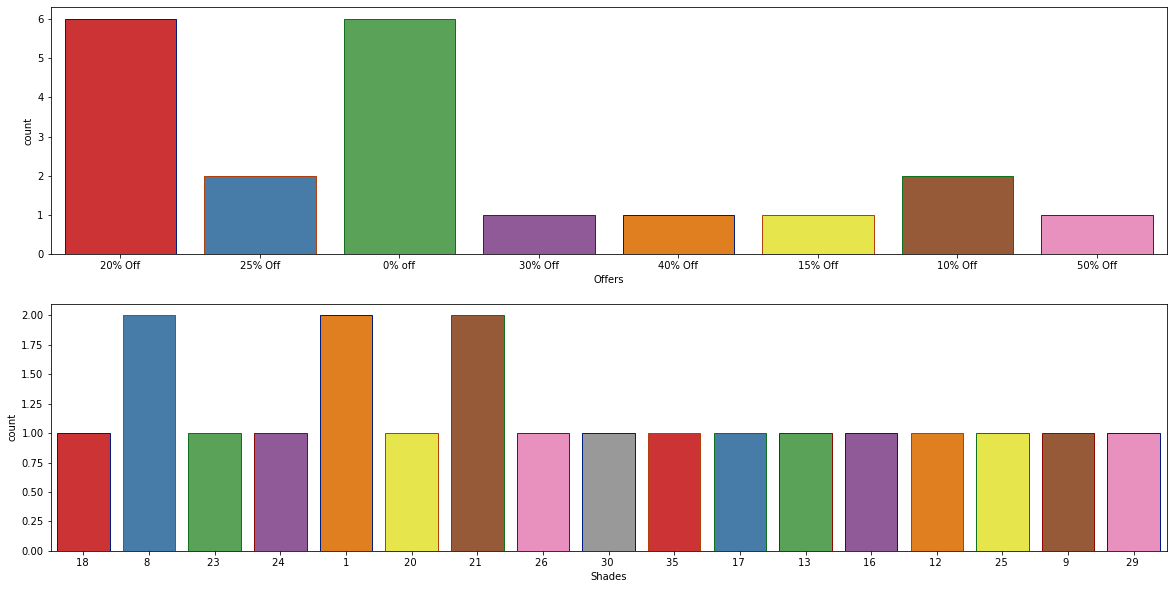

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(20,10))
sns.countplot(x=lipsticks_df['Offers'],palette="Set1",edgecolor=sns.color_palette("dark", 4),ax=axes[0])
sns.countplot(x=lipsticks_df['Shades'],palette="Set1",edgecolor=sns.color_palette("dark", 4),ax=axes[1])

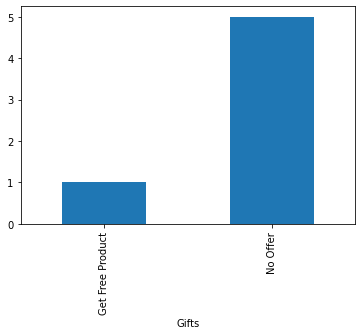

In [ ]:
z_offer=lipsticks_df[lipsticks_df['Offers']=='0% off']
z_offer.groupby(['Gifts'])['Product_name'].count().plot(kind='bar')

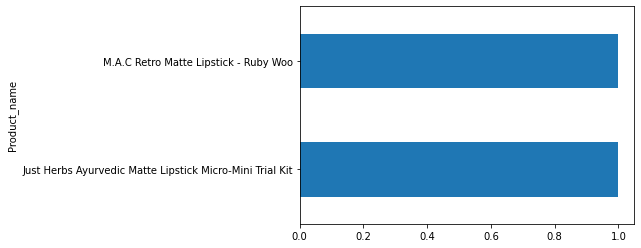

In [ ]:
single_shade=lipsticks_df[lipsticks_df['Shades']=='1']
single_shade.groupby(['Product_name'])['Shades'].count().plot(kind='barh')

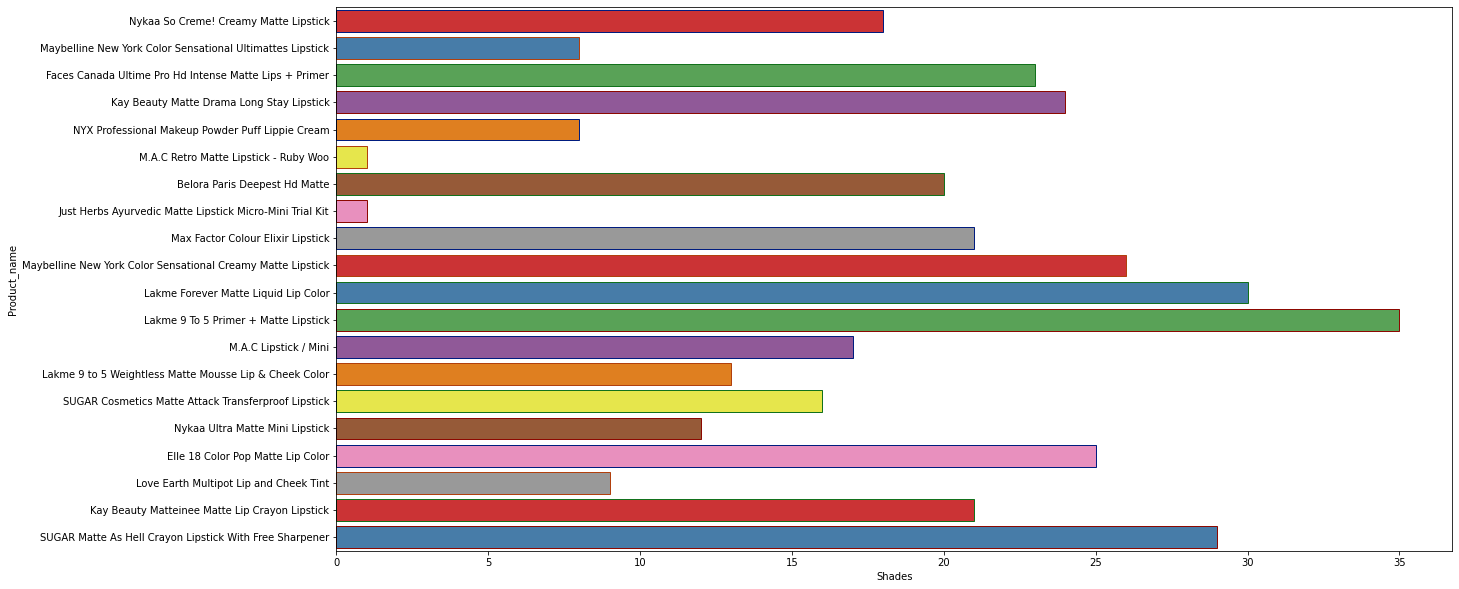

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(y=lipsticks_df['Product_name'],x=lipsticks_df['Shades'].astype(int),palette="Set1",edgecolor=sns.color_palette("dark", 4))

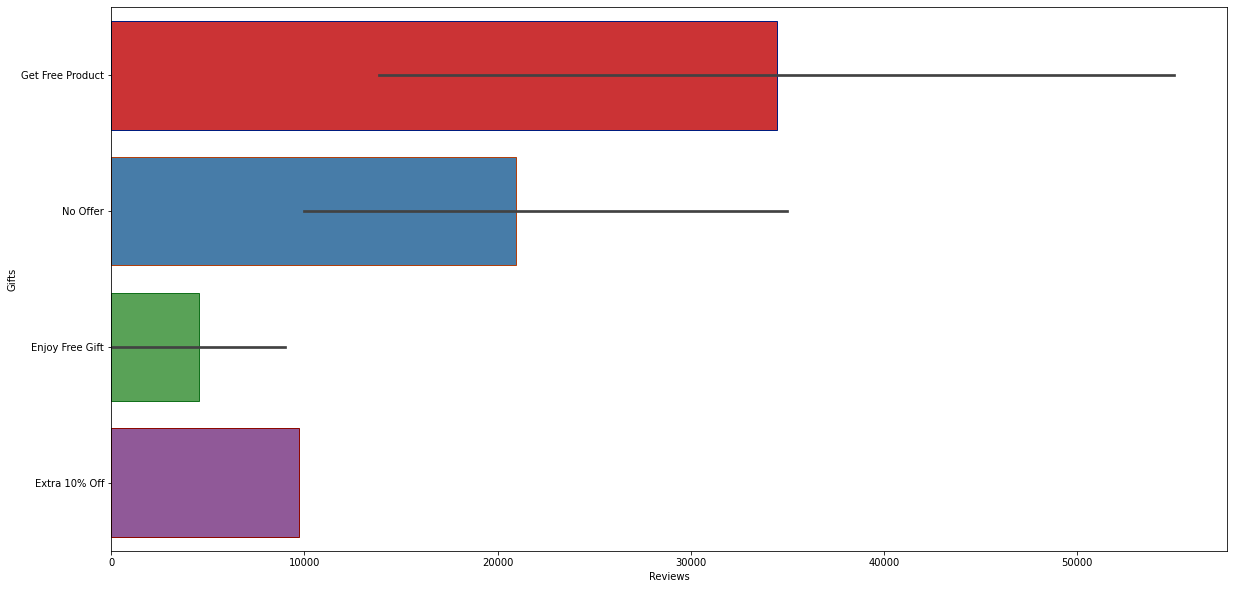

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(y=lipsticks_df['Gifts'],x=lipsticks_df['Reviews'].astype(int),palette="Set1",edgecolor=sns.color_palette("dark", 4))

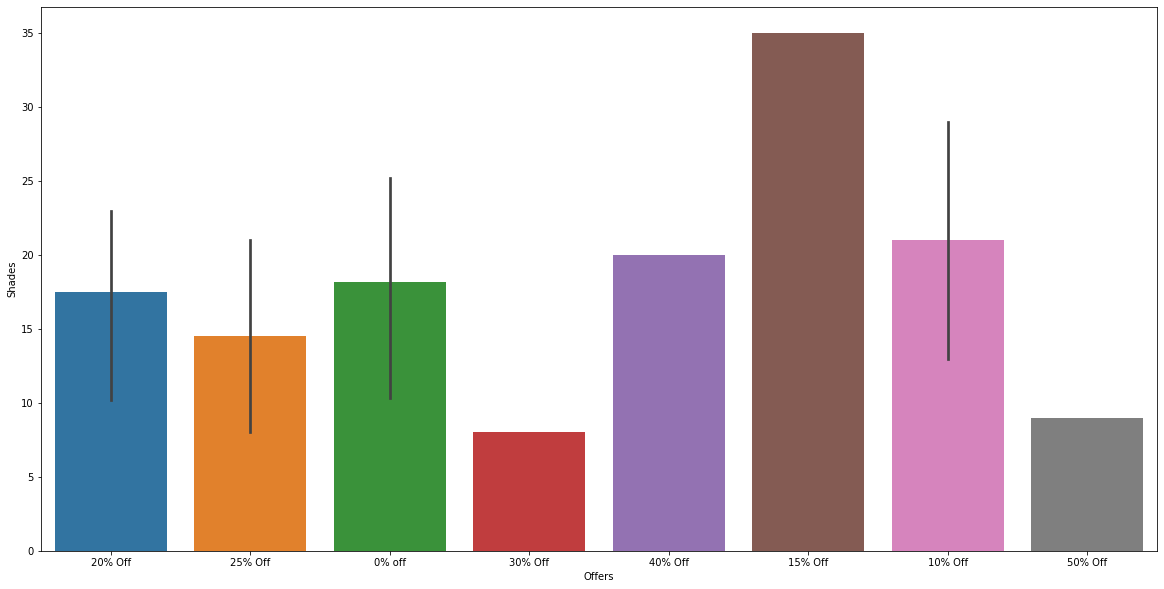

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=lipsticks_df['Offers'],y=lipsticks_df['Shades'].astype(int))

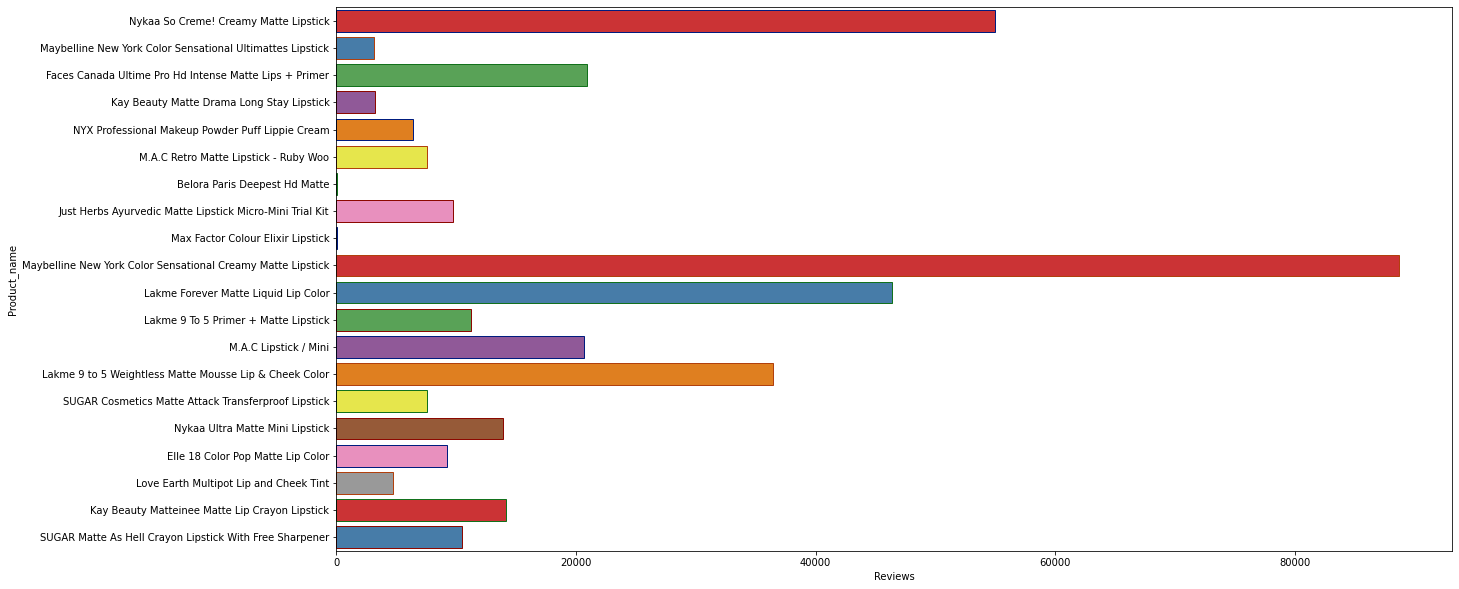

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(y=lipsticks_df['Product_name'],x=lipsticks_df['Reviews'].astype(int),palette='Set1',edgecolor=sns.color_palette('dark',4))

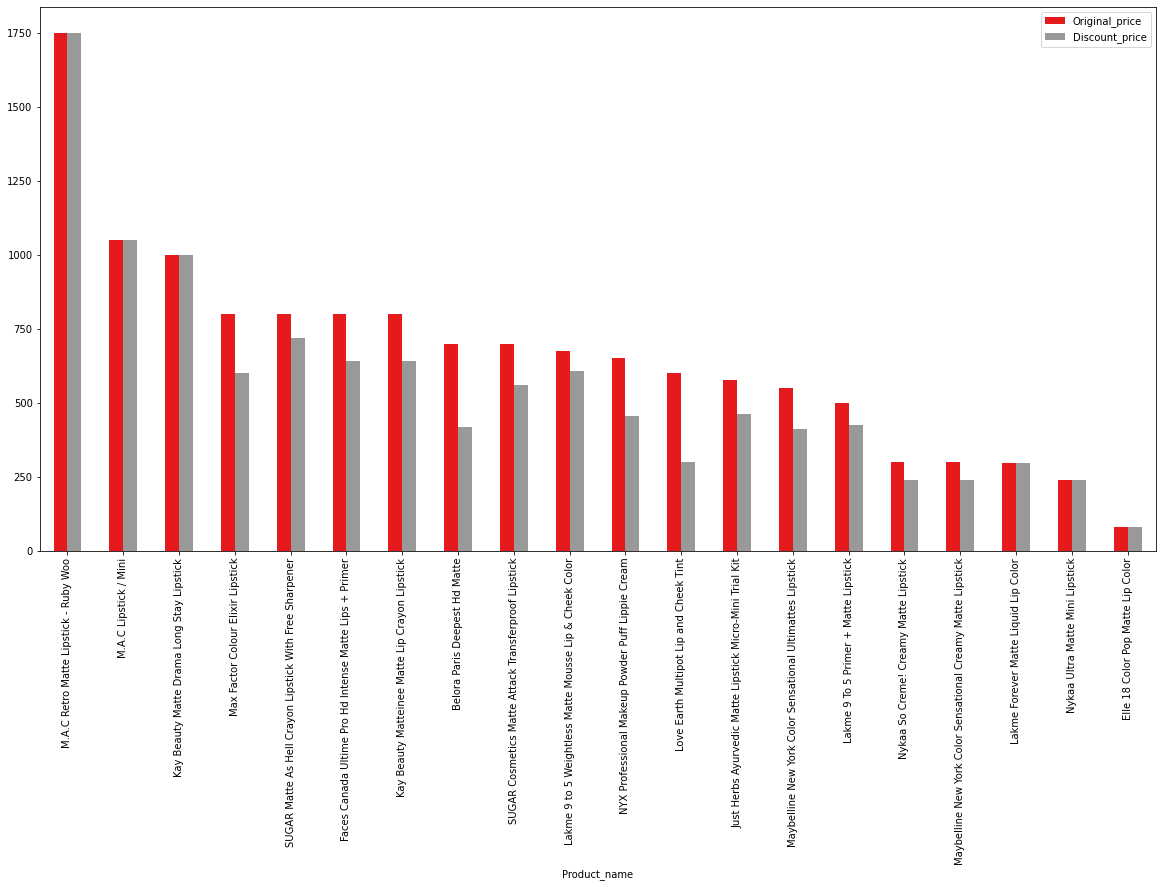

In [ ]:
lipsticks_df=lipsticks_df.set_index('Product_name')
lipsticks_df.loc[:,['Original_price','Discount_price']].sort_values(by='Original_price',ascending=False).plot(kind='bar',figsize=(20,10),cmap='Set1')